In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [2]:
DATASETS = {
    'acm_test_final': '#a89500',
    'BlogCatalog': 'red',
    'Flickr1': 'blue',
}

#Uncomment for 100 epochs avg
#TARG_FILE = '07-raw-avg-100-auc-acm-blog-flickr/aucs.csv'
#Uncomment for 300 epochs avg
TARG_FILE = '10-avg-300-auc-acm-blog-flickr/aucs.csv'

In [3]:
df = pd.read_csv(TARG_FILE, names=['Source', 'Alpha', 'AUC', 'CumulativeTime'])
#Uncomment to zoom in on higher alphas
#df = df[ df['Alpha']>0.01 ]
df

,Source,Alpha,AUC,CumulativeTime
0,BlogCatalog,0.0,0.731544,6297
1,BlogCatalog,0.1,0.851630,12631
2,BlogCatalog,0.2,0.813684,18987
3,BlogCatalog,0.3,0.799494,25356
4,BlogCatalog,0.4,0.792387,31732
...,...,...,...,...
242,acm_test_final,0.6,0.824464,45489
243,acm_test_final,0.7,0.824870,51990
244,acm_test_final,0.8,0.843971,58488
245,acm_test_final,0.9,0.839763,64987


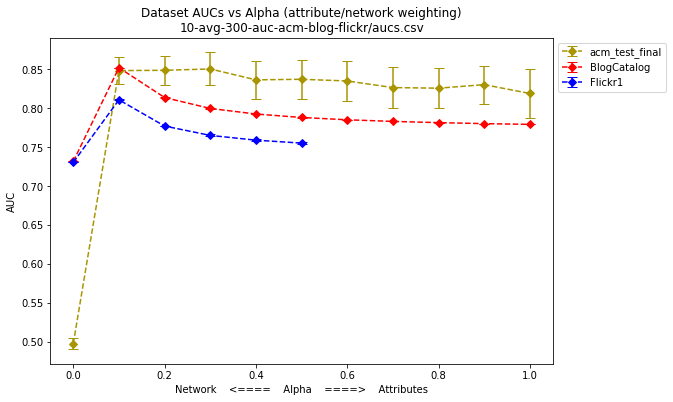

In [4]:
SCALE = 1.5
plt.figure(figsize=tuple(SCALE*i for i in plt.rcParams['figure.figsize']))

for d in DATASETS:
    desc = df[ df['Source']==d ].groupby('Alpha').describe()
    alphas = desc.index
    aucs = desc[('AUC',  'mean')]
    stds = desc[('AUC',  'std')]
    plt.errorbar(x=alphas, y=aucs, yerr=stds, label=d, color=DATASETS[d], marker='D', linestyle='dashed', capsize=5)

plt.xlabel('Network    <====    Alpha    ====>    Attributes')
plt.ylabel('AUC')
plt.title(f'Dataset AUCs vs Alpha (attribute/network weighting)\n{TARG_FILE}')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()